# Efecto Túnel en la Caja

`````{admonition} Autoría
Esta es una contribución del **Dr. Carlos Amador Bedolla**, del departamento de Física y Química Teórica de la Facultad de Química, UNAM.
`````

Este problema es continuación de la partícula en la caja y nos permite ejemplificar el efecto túnel. Para ello, planteemos una caja de $-L$ a $L$, con potencial infinito afuera de la caja, pero esta vez hay un tope de potencial en el centro de la caja

<img src="images/caja1d-tope.png" alt="Figura de la caja 1D con tope" width="300"/>

$$
V(x) = \left\{
  \begin{array}{lll}
  \infty      & \mathrm{si\ } x < -L & \text{I} \\
  0      & \mathrm{si\ } -L \le x < -a & \text{II}\\
  V & \mathrm{si\ } -a \le x \le a & \text{III} \\
  0      & \mathrm{si\ } a < x \le L & \text{IV}\\
  \infty     & \mathrm{si\ } x > L & \text{V}
  \end{array}
  \right.
$$

Es decir, el potencial vale infinito en las zonas ${\rm I}$ y ${\rm V}$, cero en las zonas ${\rm II}$ y ${\rm IV}$ (de $-L$ a $-a$ y de $+a$ a $+L$) y vale $V$ en la zona ${\rm III}$ al centro de la caja (de $-a$ a $+a$).

Particularmente estudiaremos el caso en el que la partícula tiene una energía menor al tope de potencial, $E<V$.

```{admonition} Para pensar
:class: tip
De manera clásica, la partícula no podría pasar del lado izquierdo (región ${\rm II}$) al lado derecho (región ${\rm IV}$) de la caja y viceversa porque no tiene suficiente energía para atravesar la región ${\rm III}$. Por la misma razón, la probabilidad de encontrar a la partícula en la región ${\rm III}$ es cero. ¿Qué pasará cuánticamente?
```

La eigenfunción se obtiene resolviendo la ecuación de Schrödinger

$$
\left( -\frac{\hbar^2}{2m}\frac{d^2}{dx^2}+V(x) \right) \psi(x) = E \psi(x)
$$

Como se vio antes, la eigenfunción vale cero afuera de la caja. Por lo que se puede plantear la ecuación de Schrödinger por regiones.

```{admonition} Inserto matemático: Hamiltoniano por regiones

Si analizamos la ecuación de Schrödiger por regiones se tienen los siguientes Hamiltonianos y sus respectivas soluciones:

| Región      | Hamiltoniano | Eigenfunción | Constantes |
|:----------------:|:---------:|:--------:|:--------:|
| ${\rm II}$ | $\left(-\frac{\hbar^2}{2m} \frac{d^2}{dx^2}\right) \psi_{\rm II}(x) = E \psi_{\rm II}(x)$ | $\psi_{\rm II}(x) = A \sin(k_1 x) + B\cos(k_1x)$ | $k_1^2 = \frac{2mE}{\hbar^2}$ |
| ${\rm III}$ | $\left(-\frac{\hbar^2}{2m} \frac{d^2}{dx^2} + V \right) \psi_{\rm III}(x)= E \psi_{\rm III}(x)$ | $\psi_{\rm III}(x) = C e^{k_2 x} + De^{-k_2x}$ | $k_2^2 = \frac{2m(V-E)}{\hbar^2}$ |
| ${\rm IV}$ | $\left( -\frac{\hbar^2}{2m} \frac{d^2}{dx^2}\right) \psi_{\rm IV}(x) = E \psi_{\rm IV}(x)$ | $\psi_{\rm IV}(x) = F \sin(k_1 x) + G \cos(k_1x)$ | $k_1^2 = \frac{2mE}{\hbar^2}$ |

Note que en la región ${\rm I}$ y ${\rm V}$ el potencial es infinito, por lo que $\psi_{\rm I} = \psi_{\rm V} = 0$.

```

**Importe las siguientes librerías**
- numpy
- pyplot de matplotlib
- optimize de scipy
- integrate de scipy

In [1]:
# Importe librerías

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize
from scipy import integrate

**Establezca valores para las constantes** $\hbar$, $m$, $V$, $a$, $L$.

In [3]:
# De valor a las constantes

In [4]:
hbar = 1
m = 1.0
V = 50.0
a = 0.2
L = 1.2

La eigenfunción y su derivada deben de ser continuas, por lo que podemos igualar la eigenfunción en el punto donde se unen las regiones, y obtener nuevas ecuaciones.

```{admonition} Inserto matemático: Condiciones de Frontera

| Regiones | Condición | Ecuación |
|:---: |:---: | :---:    |
| ${\rm I}$ y ${\rm II}$ | $\psi_{\rm II}(-L) = 0$ | $B = A \tan(k_1 L)$ |
| ${\rm II}$ y ${\rm III}$ | $\psi_{\rm II}(-a) = \psi_{\rm III}(-a)$ | $-A \sin(k_1 a) + B\cos(k_1 a) = C e^{-k_2a} + D e^{k_2a}$ |
| ${\rm II}$ y ${\rm III}$ | $\frac{d\psi_{\rm II}}{dx}(-a) = \frac{d\psi_{\rm III}}{dx}(-a)$ | $k_1(A \cos(k_1 a) + B\sin(k_1 a)) = k_2 (C e^{-k_2a} - D e^{k_2a})$|
| ${\rm III}$ y ${\rm IV}$ | $\psi_{\rm III}(a) = \psi_{\rm IV}(a)$ | $C e^{k_2a} + D e^{-k_2a} = F \sin(k_1 a) + G \cos(k_1 a)$|
| ${\rm IV}$ y ${\rm V}$ | $\psi_{\rm V}(L) = 0$ | $G = -F \tan(k_1 L)$|
```

A partir de aquí podemos ayudarnos de la simetría del problema.

## Simetría Par

Empezaremos asumiendo que lo que está del lado izquierdo respecto a $x=0$ tiene simetría par respecto a lo que está del lado derecho.

```{admonition} Inserto matemático: Simetría par
:class: dropdown

Al imponer la simetría en la región ${\rm III}$

$$
\begin{align}
\psi_{\rm III}(-x) &= \psi_{\rm III}(x)\\
C e^{-k_2 x} + De^{k_2x} &= C e^{k_2 x} + De^{-k_2x}\\
\end{align}
$$

La ecuación se cumple si $C = D$, por tanto

$$
\psi_{\rm III}(x) = C \left(e^{k_2 x} + e^{-k_2x} \right)
$$

Si dividimos la ecuación de continuidad de la derivada entre la ecuación de continuidad de la eigenfunción entre las zonas ${\rm II}$ y ${\rm III}$ se obtiene

$$
k_1\frac{A \cos(k_1 a) + B\sin(k_1 a)}{-A \sin(k_1 a) + B\cos(k_1 a)} = k_2 \frac{C e^{-k_2a} - D e^{k_2a}}{C e^{-k_2a} + D e^{k_2a}}
$$

Sustituyendo la condición de simetría par ($C=D$) y la continuidad entre las zonas I y II ($B = A \tan(k_1L)$)

$$
k_1\frac{\cos(k_1 a) + \sin(k_1 a)\tan(k_1 L)}{- \sin(k_1 a) + \cos(k_1 a)\tan(k_1 L)} = - k_2 \tanh(k_2a)
$$

Simplificando

$$
k_1\frac{1 + \tan(k_1 a)\tan(k_1 L)}{\tan(k_1 a) - \tan(k_1 L)} = k_2 \tanh(k_2a)
$$

Aplicamos la identidad trigonométrica $\frac{\tan(\theta) - \tan(\phi)}{1 + \tan(\theta)\tan(\phi)} = \tan(\theta - \phi)$

$$
\frac{k_1}{k_2} = \tanh(k_2a) \tan(k_1(a-L))
$$

El siguiente paso es sustituir los valores de $k_1$ y $k_2$.
```

Las energías permitidas se obtienen al resolver la ecuación

$$
\sqrt{\frac{E}{V-E}} = \tanh \left(\sqrt{\frac{2m(V-E)}{\hbar^2}} a \right) \tan \left(\sqrt{\frac{2mE}{\hbar^2}}(a-L) \right)
$$

En esta ecuación no es trivial despejar $E$, pero la igualdad sólo se cumplirá con la $E$ correcta. Una forma más simple es elevar al cuadrado y pasar todo a la derecha, tal que definamos $f(E)$

$$
f(E) = \tanh^2 \left(\sqrt{\frac{2m(V-E)}{\hbar^2}} a \right) \tan^2 \left(\sqrt{\frac{2mE}{\hbar^2}}(a-L) \right) - \frac{E}{V-E}
$$

Cuando se tenga el $E$ correcto se cumplirá $f(E) = 0$, así que sólo tenemos que buscar los ceros (o raíces) de la función.

**Defina la función $f(E)$**

In [5]:
# f(E)

In [6]:
def f(E): 
    
    arg1 = np.sqrt(2*m*(V-E)/hbar**2)*a
    arg2 = np.sqrt(2*m*E/hbar**2)*(a-L)
    
    return np.tanh(arg1)**2*np.tan(arg2)**2 - E/(V-E)

Para obtener los valores de $E$ que hacen que $f(E)$ se vuelva cero, cree un conjunto de puntos de $E$ con muchos puntos entre $0$ y $V$, puede usar la instrucción
```
E_dominio = np.linspace(0,V,10000)
```

In [7]:
# E_dominio

In [8]:
E_dominio = np.linspace(0,V,10000)

**Para cada uno de estos puntos evalúe si $f(E)$ es menor a $10^{-2}$**, si la condición se cumple el valor de $E$ es un buen candidato para ser una raíz de $f(E)$. Haga una lista con los valores de E que cumplieron el criterio, este será su `primer guess`.

In [9]:
E_primerguess = []
for E_i in E_dominio:
    if (abs(f(E_i))<1e-2):
        E_primerguess.append(E_i)

/tmp/ipykernel_14357/383531475.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  return np.tanh(arg1)**2*np.tan(arg2)**2 - E/(V-E)


Python tiene funciones especiales para buscar raíces partiendo de cierto punto. La siguiente línea busca la raíz de $f(E)$ más cercana a un punto $E_i$

```
E = newton(f,x0=E_i)
```

Para cada valor de energía de su primer guess, utilice el método de Newton para obtener la raíz más cercana y guárdela en una lista si la diferencia con la última raíz es mayor a 0.1. Este será su `segundo guess`.

In [10]:
E_segundoguess = [0]
for E_i in E_primerguess:
    E = optimize.newton(f,x0=E_i)
    if (abs(E_segundoguess[-1] - E) > 0.1 ):
        E_segundoguess.append(E)

Imprima su segundo guess

In [11]:
# Impresión

In [12]:
print(E_segundoguess)

[0, 4.03702980948585, 6.183977172993017, 15.950917097849251, 25.481208577291266, 34.789304765449806]


Defina funciones para

$$
k_1 = \frac{2mE}{\hbar^2}
$$

$$
k_2 = \frac{2m(V-E)}{\hbar^2}
$$

In [13]:
# Defina funciones

In [14]:
def k1(E): return np.sqrt(2*m*E/hbar**2)
def k2(E): return np.sqrt(2*m*(V-E)/hbar**2)

Hasta aquí ya somos capaces de obtener las energías permitidas. Falta normalizar la eigenfunción y graficarla.

```{admonition} Inserto matemático: Análisis de las constantes $A$, $B$, $C$, $D$, $F$ y $G$

Por la continuidad de la zona ${\rm II}$ y ${\rm III}$, con $B=A\tan(k_1 L)$ y $C=D$, se tiene

$$
\begin{align}
\psi_{\rm I}(-a) &= \psi_{\rm III}(-a)\\
-A \sin(k_1 a) + B\cos(k_1a) &= C e^{-k_2a} + De^{k_2a}\\
A \left( -\sin(k_1 a) + \tan(k_1L)\cos(k_1a) \right) &= C \left( e^{-k_2a} + e^{k_2a} \right) \\
A &= C \left(\frac{e^{-k_2a} + e^{k_2a}}{-\sin(k_1 a) + \tan(k_1L)\cos(k_1a)}\right)
\end{align}
$$

De la misma manera, la continuidad de la zona ${\rm III}$ y ${\rm IV}$ con $G=-F \tan(k_1 L)$ y $C=D$ nos dice

$$
\begin{align}
\psi_{\rm III}(a) &= \psi_{\rm IV}(a)\\
C e^{k_2a} + De^{-k_2a} &= F \sin(k_1 a) + G\cos(k_1a)\\
C \left( e^{k_2a} + e^{-k_2a} \right) &= F \left( \sin(k_1 a) - \tan(k_1L) \cos(k_1a) \right)\\
F &= C \left(\frac{ e^{k_2a} + e^{-k_2a} }{\sin(k_1 a) - \tan(k_1L) \cos(k_1a)}\right)
\end{align}
$$

En este punto tenemos las siguientes relaciones entre los coeficientes

| Coeficientes Relacionados | Relación |
|:---: |:---: | 
| $A$ y $B$ | $B = A \tan(k_1 L)$ |
| $A$ y $C$ | $A = C \left(\frac{e^{k_2a} + e^{-k_2a}}{-\sin(k_1 a) + \tan(k_1L)\cos(k_1a)}\right)$ |
| $C$ y $D$ | $C = D$|
| $F$ y $G$ | $G = -F \tan(k_1 L)$ |
| $F$ y $C$ | $F = C \left(\frac{ e^{k_2a} + e^{-k_2a} }{\sin(k_1 a) - \tan(k_1L) \cos(k_1a)}\right)$|

Note que es posible poner todo en función de $C$. Además note que $A = -F$ y $B = G$. El valor de $C$ debe ser aquel que haga que la eigenfunción este normalizada. Aunque es posible obtener una función analítica, aquí tomaremos un camino numérico.
```

Defina funciones para

$$
\psi_{\rm II}(x) = \frac{e^{-k_2a}+e^{k_2a}}{-\sin(k_1a)+\tan(k_1L)\cos(k_1a)} \sin(k_1x)+\tan(k_1L)\cos(k_1x)
$$

$$
\psi_{\rm III}(x) = e^{k_2x}+e^{-k_2x}
$$

$$
\psi_{\rm IV}(x) = \frac{e^{k_2a}+e^{-k_2a}}{\sin(k_1a)-\tan(k_1L)\cos(k_1a)}(\sin(k_1x)-\tan(k_1L)\cos(k_1x))
$$

In [15]:
# Defina funciones

In [16]:
def psi_II(x): return (np.exp(-k2(E)*a)+np.exp(k2(E)*a))/(-np.sin(k1(E)*a)+np.tan(k1(E)*L)*np.cos(k1(E)*a))*(np.sin(k1(E)*x)+np.tan(k1(E)*L)*np.cos(k1(E)*x))
def psi_III(x): return np.exp(k2(E)*x)+np.exp(-k2(E)*x)
def psi_IV(x): return (np.exp(k2(E)*a)+np.exp(-k2(E)*a))/(np.sin(k1(E)*a)-np.tan(k1(E)*L)*np.cos(k1(E)*a))*(np.sin(k1(E)*x)-np.tan(k1(E)*L)*np.cos(k1(E)*x))

Cree tres dominios de 1000 puntos para la eigenfunción, tal que

$$
x_{\rm II} \in [-L,-a]
$$

$$
x_{\rm III} \in [-a,a]
$$

$$
x_{\rm IV} \in [a,L]
$$

In [17]:
# x_II, x_III y x_IV

In [18]:
x_II = np.linspace(-L,-a,10000)
x_III = np.linspace(-a,a,10000)
x_IV = np.linspace(a,L,10000)

Utilice las energías del segundo guess para graficar las eigenfunciones. Recuerde respetar la normalización.

E: 4.03702980948585 Probabilidad de [-a,a]: 0.009171376328832647


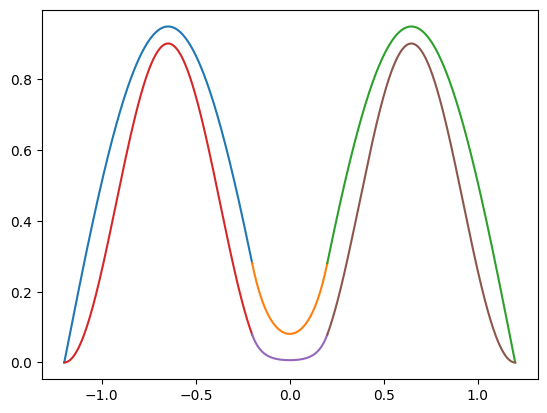

E: 6.183977172993017 Probabilidad de [-a,a]: 0.017525687126182975


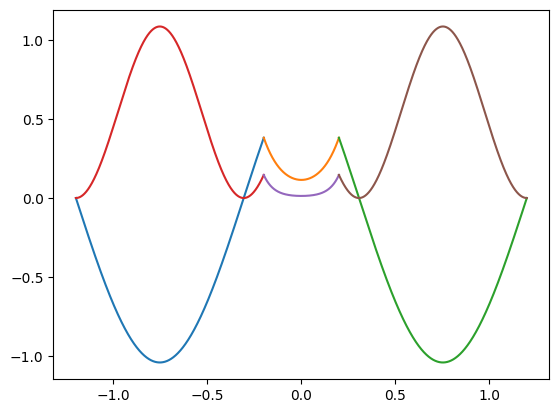

E: 15.950917097849251 Probabilidad de [-a,a]: 0.04344512067766844


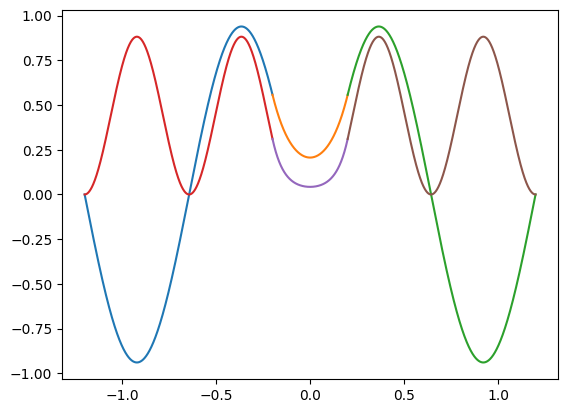

E: 25.481208577291266 Probabilidad de [-a,a]: 0.09411665657854962


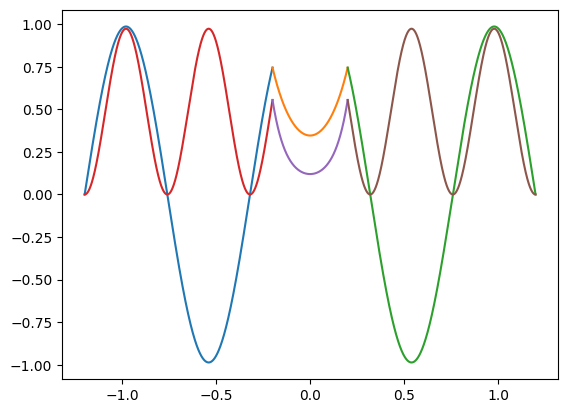

E: 34.789304765449806 Probabilidad de [-a,a]: 0.13886978965910068


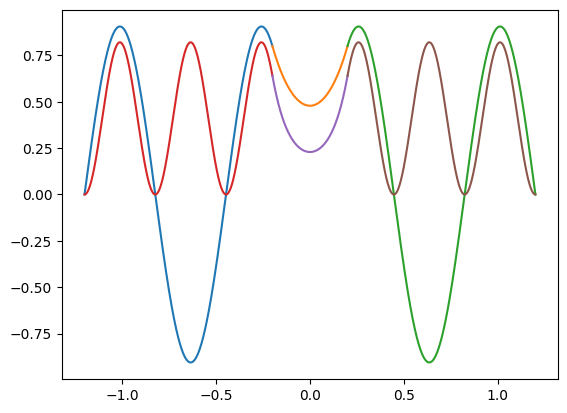

In [19]:
for E in E_segundoguess:
    if(E>0):
        norm2 = 0.0
        
        norm2 = norm2 + integrate.quad(lambda x: psi_II(x)*psi_II(x), -L, -a)[0]
        norm2 = norm2 + integrate.quad(lambda x: psi_III(x)*psi_III(x), -a, a)[0]
        norm2 = norm2 + integrate.quad(lambda x: psi_IV(x)*psi_IV(x), a, L)[0]
                
        plt.plot(x_II,psi_II(x_II)/np.sqrt(norm2))
        plt.plot(x_III,psi_III(x_III)/np.sqrt(norm2))
        plt.plot(x_IV,psi_IV(x_IV)/np.sqrt(norm2)) 
        
        prob = integrate.quad(lambda x: psi_III(x)*psi_III(x), -a, a)[0]/norm2
        print("E: " + str(E) + " Probabilidad de [-a,a]: " + str(prob))
        
        plt.plot(x_II,psi_II(x_II)*psi_II(x_II)/norm2)
        plt.plot(x_III,psi_III(x_III)*psi_III(x_III)/norm2)
        plt.plot(x_IV,psi_IV(x_IV)*psi_IV(x_IV)/norm2)

        plt.show()

## Simetría impar

Empezaremos asumiendo que lo que esta del lado izquierdo de $x=0$ tiene simetría impar respecto a lo que está del lado derecho.

```{admonition} Inserto matemático: Simetría impar
:class: dropdown

Al imponer la simetría en la región III

$$
\begin{align}
\psi_{\rm III}(-x) &= -\psi_{\rm III}(x)\\
C e^{-k_2 x} + De^{k_2x} &= -C e^{k_2 x} - De^{-k_2x}\\
\end{align}
$$

La ecuación se cumple si $C = -D$, por \tanto

$$
\psi_{\rm III}(x) = C \left(e^{k_2 x} - e^{-k_2x} \right)
$$

Si dividimos la ecuación de continuidad de la derivada entre la ecuación de continuidad de la eigenfunción entre las zonas ${\rm II}$ y ${\rm III}$ se obtiene

$$
k_1\frac{A \cos(k_1 a) + B\sin(k_1 a)}{-A \sin(k_1 a) + B\cos(k_1 a)} = k_2 \frac{C e^{-k_2a} - D e^{k_2a}}{C e^{-k_2a} + D e^{k_2a}}
$$

Sustituyendo la condición de simetría par ($C=-D$) y la continuidad entre las zonas ${\rm I}$ y ${\rm II}$ ($B = A \tan(k_1L)$)

$$
k_1\frac{\cos(k_1 a) + \sin(k_1 a)\tan(k_1 L)}{- \sin(k_1 a) + \cos(k_1 a)\tan(k_1 L)} = - k_2 \tanh^{-1}(k_2a)
$$

Simplificando

$$
k_1\frac{1 + \tan(k_1 a)\tan(k_1 L)}{\tan(k_1 a) - \tan(k_1 L)} = k_2 \tanh^{-1}(k_2a)
$$

Aplicamos la identidad trigonométrica $\frac{\tan(\theta) - \tan(\phi)}{1 + \tan(\theta)\tan(\phi)} = \tan(\theta - \phi)$

$$
\frac{k_1}{k_2} = \tanh^{-1}(k_2a) \tan(k_1(a-L))
$$

El siguiente paso es sustituir los valores de $k_1$ y $k_2$.
```


Al considerar esta condición en las ecuaciones de continuidad, se obtiene la siguiente ecuación

$$
\tanh^{-1} \left(\sqrt{\frac{2m(V-E)}{\hbar^2}} a \right) \tan \left(\sqrt{\frac{2mE}{\hbar^2}}(a-L) \right) = \sqrt{\frac{E}{V-E}}
$$

En esta ecuación no es trivial despear E, pero la igualdad solo se cumplirá con la $E$ correcta. Una forma más simple es elevar al cuadrado y pasar todo a la derecha, tal que definamos $f(E)$

$$
f(E) = \left( \tanh^{-1} \left(\sqrt{\frac{2m(V-E)}{\hbar^2}} a \right) \right)^2 \tan^2 \left(\sqrt{\frac{2mE}{\hbar^2}}(a-L) \right) - \frac{E}{V-E}
$$

Cuando se tenga el $E$ correcto se cumplirá $f(E) = 0$, así que solo tenemos que buscar los ceros (o raíces) de la función.

**Defina la función $f(E)$**

In [20]:
def f(E): 
    arg1 = np.sqrt(2*m*(V-E)/hbar**2)*a
    arg2 = np.sqrt(2*m*(E)/hbar**2)*(a-L)
    
    return (1/np.tanh(arg1))**2*np.tan(arg2)**2 - E/(V-E)

Obtenga su guess de valores de energía

```{tip}
- Genere un conjunto de 1000 puntos de $E$ de $0$ a V
- Seleccione aquellos para los que $f(E)$ es menor que $10^{-2}$
- Utilice el método de Newton para obtener valores únicos de energía
```

In [21]:
E_dominio = np.linspace(0,V,10000)

E_primerguess = []
for E in E_dominio:
    if (abs(f(E))<1e-2):
        E_primerguess.append(E)
    
E_segundoguess = [0]
for E in E_primerguess:
    E_i = optimize.newton(f,x0=E)
    if (abs(E_segundoguess[-1] - E_i) > 0.1 ):
        E_segundoguess.append(E_i)

/tmp/ipykernel_14357/2773694175.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  return (1/np.tanh(arg1))**2*np.tan(arg2)**2 - E/(V-E)
/tmp/ipykernel_14357/2773694175.py:5: RuntimeWarning: invalid value encountered in double_scalars
  return (1/np.tanh(arg1))**2*np.tan(arg2)**2 - E/(V-E)


Hasta aquí ya somos capaces de obtener las energías permitidas. Falta normalizar la eigenfunción y graficarla.

```{admonition} Inserto matemático: Análisis de las constantes $A$, $B$, $C$, $D$, $F$ y $G$

Por la continuidad de la zona ${\rm II}$ y ${\rm III}$, con $B=A\tan(k_1 L)$ y $C=-D$, se tiene

$$
\begin{align}
\psi_{\rm I}(-a) &= \psi_{\rm III}(-a)\\
-A \sin(k_1 a) + B\cos(k_1a) &= C e^{-k_2a} + De^{k_2a}\\
A \left( -\sin(k_1 a) + \tan(k_1L)\cos(k_1a) \right) &= C \left( e^{-k_2a} - e^{k_2a} \right) \\
A &= C \left(\frac{e^{-k_2a} - e^{k_2a}}{-\sin(k_1 a) + \tan(k_1L)\cos(k_1a)}\right)
\end{align}
$$

De la misma manera, la continuidad de la zona ${\rm III}$ y ${\rm IV}$ con $G=-F \tan(k_1 L)$ y $C=-D$ nos dice

$$
\begin{align}
\psi_{\rm III}(a) &= \psi_{\rm IV}(a)\\
C e^{k_2a} + De^{-k_2a} &= F \sin(k_1 a) + G\cos(k_1a)\\
C \left( e^{k_2a} - e^{-k_2a} \right) &= F \left( \sin(k_1 a) - \tan(k_1L) \cos(k_1a) \right)\\
F &= C \left(\frac{ e^{k_2a} - e^{-k_2a} }{\sin(k_1 a) - \tan(k_1L) \cos(k_1a)}\right)
\end{align}
$$

En este punto tenemos las siguientes relaciones entre los coeficientes

| Coeficientes Relacionados | Relación |
|:---: |:---: | 
| $A$ y $B$ | $B = A \tan(k_1 L)$ |
| $A$ y $C$ | $A = C \left(\frac{e^{k_2a} - e^{-k_2a}}{-\sin(k_1 a) + \tan(k_1L)\cos(k_1a)}\right)$ |
| $C$ y $D$ | $C = - D$|
| $F$ y $G$ | $G = -F \tan(k_1 L)$ |
| $F$ y $C$ | $F = C \left(\frac{ e^{k_2a} - e^{-k_2a} }{\sin(k_1 a) - \tan(k_1L) \cos(k_1a)}\right)$|

Note que es posible poner todo en función de $C$. Además note que $A = E$ y $B = -F$. El valor de $C$ debe ser aquel que haga que la eigenfunción esté normalizada. Aunque es posible obtener una función analítica, aquí tomaremos un camino numérico.
```

Defina funciones para:

$$
\psi_{\rm II}(x) = \frac{e^{-k_2a}-e^{k_2a}}{-\sin(k_1a)+\tan(k_1L)\cos(k_1a)}(\sin(k_1x)+\tan(k_1L)\cos(k_1x))
$$

$$
\psi_{\rm III}(x) = e^{k_2x}-e^{-k_2x}
$$

$$
\psi_{\rm IV}(x) = \frac{e^{k_2a}-e^{-k_2a}}{\sin(k_1a)-\tan(k_1L)\cos(k_1a)}(\sin(k_1x)-\tan(k_1L)\cos(k_1x))
$$

In [22]:
# Funciones

In [23]:
def psi_II(x): return (np.exp(-k2(E)*a)-np.exp(k2(E)*a))/(-np.sin(k1(E)*a)+np.tan(k1(E)*L)*np.cos(k1(E)*a))*(np.sin(k1(E)*x)+np.tan(k1(E)*L)*np.cos(k1(E)*x))
def psi_III(x): return np.exp(k2(E)*x)-np.exp(-k2(E)*x)
def psi_IV(x): return (np.exp(k2(E)*a)-np.exp(-k2(E)*a))/(np.sin(k1(E)*a)-np.tan(k1(E)*L)*np.cos(k1(E)*a))*(np.sin(k1(E)*x)-np.tan(k1(E)*L)*np.cos(k1(E)*x))

Realice las gráficas de la eigenfunción

In [24]:
# Gráficas

E: 4.098118934645123 Probabilidad de [-a,a]: 0.06152438345572405


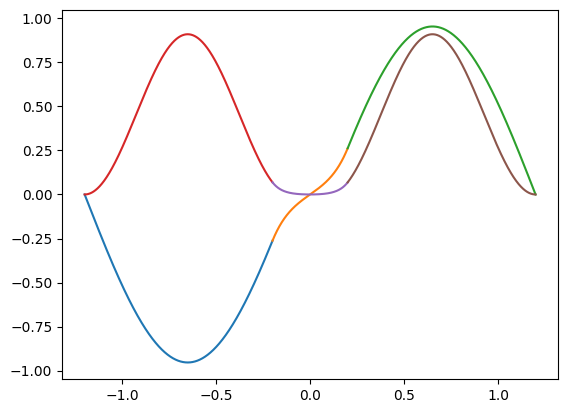

E: 6.062762952515444 Probabilidad de [-a,a]: 0.29151676557600037


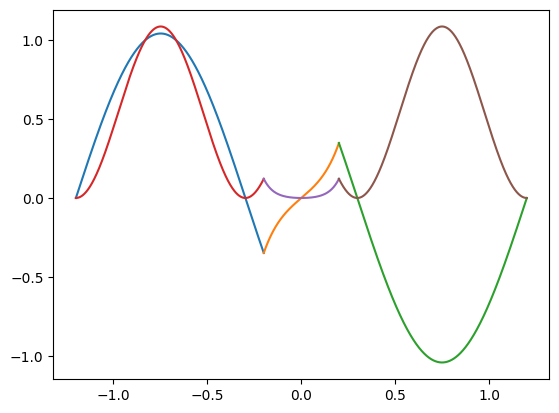

E: 16.302766510025553 Probabilidad de [-a,a]: 0.1553139426950121


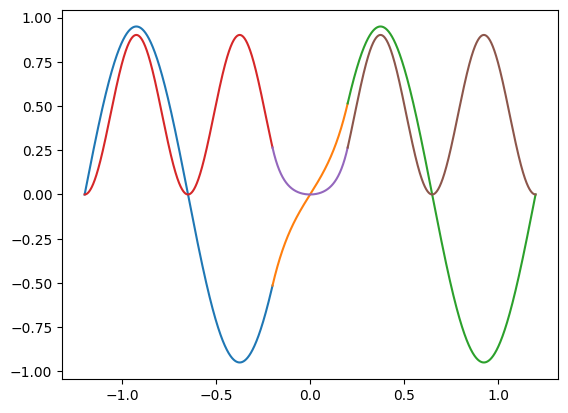

E: 24.50996443721989 Probabilidad de [-a,a]: 0.21637118642172976


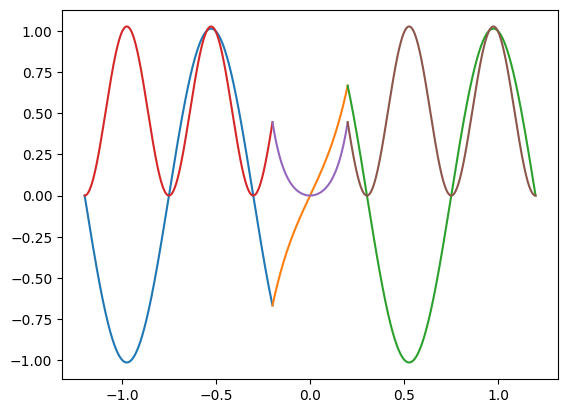

E: 36.30141253472844 Probabilidad de [-a,a]: 0.1767475720645189


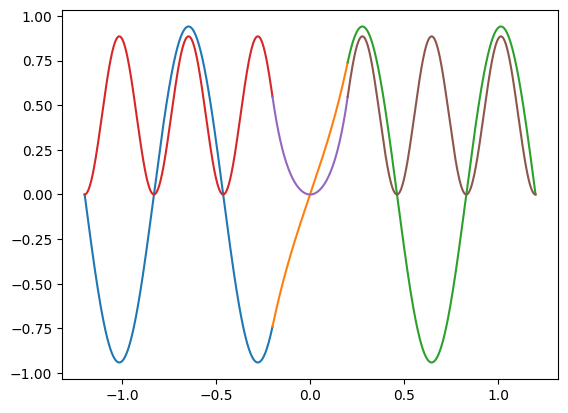

In [25]:
for E in E_segundoguess:
    if(E>0):
        norm = 0.0
        
        norm = norm + integrate.quad(lambda x: psi_II(x)*psi_II(x), -L, -a)[0]
        norm = norm + integrate.quad(lambda x: psi_III(x)*psi_III(x), -a, a)[0]
        norm = norm + integrate.quad(lambda x: psi_IV(x)*psi_IV(x), a, L)[0]
                
        plt.plot(x_II,psi_II(x_II)/np.sqrt(norm))
        plt.plot(x_III,psi_III(x_III)/np.sqrt(norm))
        plt.plot(x_IV,psi_IV(x_IV)/np.sqrt(norm)) 
        
        prob = integrate.quad(lambda x: psi_II(x)*psi_II(x), -a, a)[0]/norm
        print("E: " + str(E) + " Probabilidad de [-a,a]: " + str(prob))
        
        plt.plot(x_II,psi_II(x_II)*psi_II(x_II)/norm)
        plt.plot(x_III,psi_III(x_III)*psi_III(x_III)/norm)
        plt.plot(x_IV,psi_IV(x_IV)*psi_IV(x_IV)/norm)

        plt.show()

In [26]:
from OptMultiple import MultipleChoice

In [27]:
question = "Si la partícula tiene energía menor que V, la probabilidad de encontrarla en el intervalo [-a,a] es cero."
answers = [
    "Cierto",
    "Falso"
]
explanation = (
    "La probabilidad es distinta de cero por el efecto túnel, como se ha visto en estos ejercicios."
)
MultipleChoice(
    question, answers, correct_answer=1, explanation=explanation
)

# Referencias

- V.W.D. Cruzeiro, X. Gao, y V.D. Kleiman, Implementing New Educational Platforms in the Classroom: An Interactive Approach to the Particle in a Box Problem, J. Chem. Educ. 96, 1663 (2019).
- J.P. Lowe y K. Peterson, Quantum Chemistry (Academic Press, 2006).